### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [23]:
data = pd.read_csv('coupons.csv')

In [26]:

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [28]:
missing_values = data.isnull().sum()
print(f"Missing values per column:\n{missing_values}")
## note that the "Car" column is missing data for nearly all records

Missing values per column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [29]:
print(data['car'].dropna().unique()) ## Show all non null values in the Car collumn as a reference
## Based on the output, I initially decided to replace all null values with "Unknown" 
## However the very limited and seemingly unrelated objects within the collumn lead me to believe that the data in this collumn will not be of much use

['Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']


3. Decide what to do about your missing data -- drop, replace, other...

In [30]:
## data['car'] = data['car'].fillna('unknown') ## Decided it was better to Drop the car column
data.drop('car', axis=1, inplace=True) ## Drop the car column because none of the data is useful
cols_to_check = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data = data.dropna(subset=cols_to_check) ## Drop all rows with null values for the remaining 5 fields which are of use, this is a very small number of records

4. What proportion of the total observations chose to accept the coupon? 



In [33]:
total_observations = len(data) ## All nulls removed
coupon_acceptance = data['Y'].sum()  # 'Y' column indicates acceptance (1) or not (0)
acceptance_rate = coupon_acceptance / total_observations
print(f"Coupon acceptance rate: {acceptance_rate}") ## print acceptance rate

Coupon acceptance rate: 0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

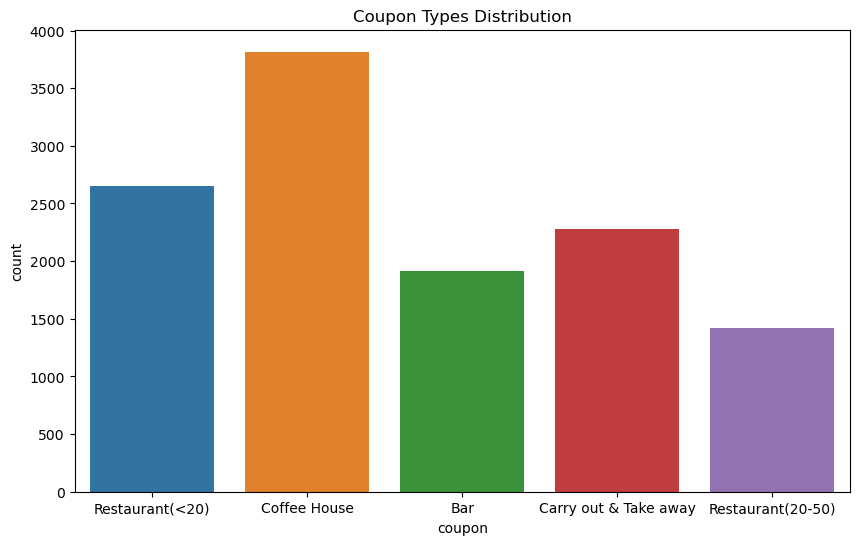

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='coupon')
plt.title('Coupon Types Distribution')
plt.show()


6. Use a histogram to visualize the temperature column.

In [38]:
print(data['temperature'].dropna().unique())

[55 80 30]


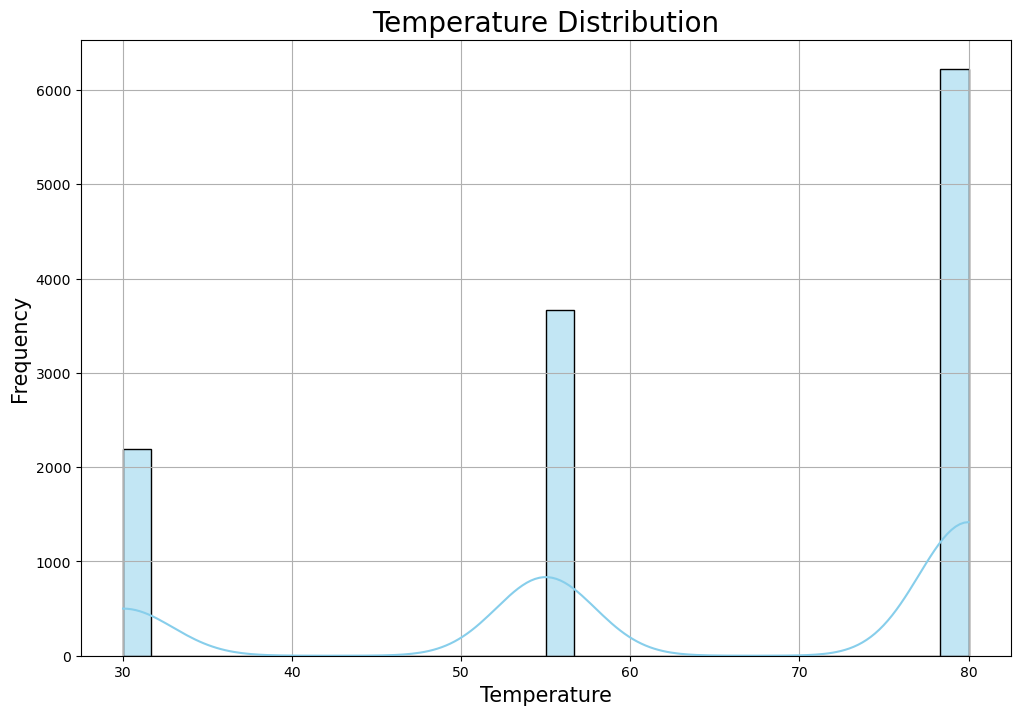

In [39]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x='temperature', bins=30, color='skyblue', kde=True)
plt.title('Temperature Distribution', fontsize=20)
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.show()



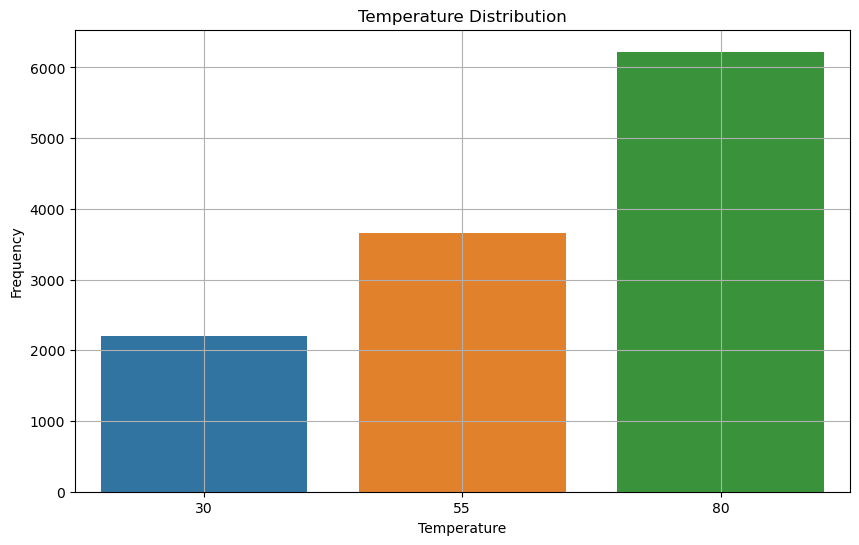

In [40]:
## I felt a bar chart would do a better job representing this data since there are only 3 values
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='temperature')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


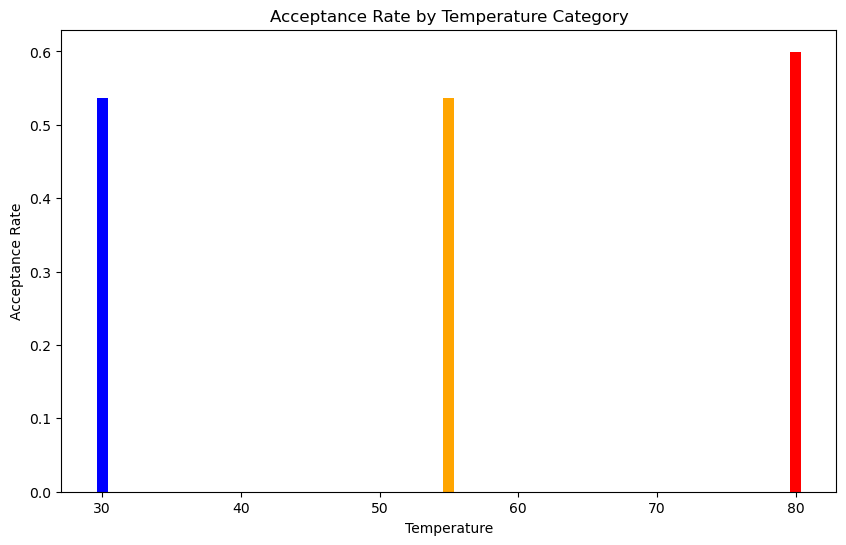

In [94]:


# Calculate the acceptance rate for each temperature category
temp_acceptance = data.groupby('temperature')['Y'].mean()

# Create the bar chart
plt.figure(figsize=(10,6))
plt.bar(temp_acceptance.index, temp_acceptance.values, color=['blue', 'orange', 'red'])

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Temperature Category')

# Display the chart
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [63]:
bar_coupons = data.loc[data['coupon'] == 'Bar']
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


In [64]:
bar_coupons.info()
bar_coupons.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null 

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,1913.000000,1913.000000,1913.0,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000
mean,57.613696,0.427601,1.0,0.662311,0.253528,0.210141,0.789859,0.411918
std,17.889882,0.494860,0.0,0.473046,0.435145,0.407515,0.407515,0.492309
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
2. What proportion of bar coupons were accepted?


In [65]:
total_bar_observations = len(bar_coupons) ## Length of Bar coupon responses
bar_coupon_acceptance = bar_coupons['Y'].sum()  # 'Y' column indicates acceptance (1) or not (0)
bar_acceptance_rate = bar_coupon_acceptance / total_bar_observations
print(f"Coupon acceptance rate: {bar_acceptance_rate}") ## print acceptance rate

Coupon acceptance rate: 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [66]:
print(bar_coupons['Bar'].unique()) ## check the unique values in the column

['never' 'less1' '1~3' 'gt8' '4~8']


In [67]:
# Define two groups based on bar visits
less_frequent_visitors = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
more_frequent_visitors = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates for each group
less_frequent_acceptance_rate = less_frequent_visitors['Y'].sum() / len(less_frequent_visitors)
more_frequent_acceptance_rate = more_frequent_visitors['Y'].sum() / len(more_frequent_visitors)

print(f"Acceptance rate for people who visit bars 3 or fewer times a month: {less_frequent_acceptance_rate}")
print(f"Acceptance rate for people who visit bars more than 3 times a month: {more_frequent_acceptance_rate}")


Acceptance rate for people who visit bars 3 or fewer times a month: 0.37267441860465117
Acceptance rate for people who visit bars more than 3 times a month: 0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [68]:
# Convert 'age' column to numeric
bar_coupons.loc[:, 'age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')


# Define two groups based on bar visits and age
more_frequent_older = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons['age'] > 25)]
others = bar_coupons[~bar_coupons.index.isin(more_frequent_older.index)]

# Calculate acceptance rates for each group
more_frequent_older_acceptance_rate = more_frequent_older['Y'].sum() / len(more_frequent_older)
others_acceptance_rate = others['Y'].sum() / len(others)

print(f"Acceptance rate for people who visit bars more than once a month and are over 25: {more_frequent_older_acceptance_rate}")
print(f"Acceptance rate for all other people: {others_acceptance_rate}")

Acceptance rate for people who visit bars more than once a month and are over 25: 0.6941176470588235
Acceptance rate for all other people: 0.35092180546726004


C:\Users\wallc\AppData\Local\Temp\ipykernel_31060\1745855532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons.loc[:, 'age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')
C:\Users\wallc\AppData\Local\Temp\ipykernel_31060\1745855532.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bar_coupons.loc[:, 'age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [69]:
more_frequent_not_kid = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons['passanger'] != 'Kid')]


In [70]:
more_frequent_not_kid_not_farmer = more_frequent_not_kid[more_frequent_not_kid['occupation'] != 'Farming, Fishing, and Forestry']



In [71]:
acceptance_rate_more_frequent_not_kid_not_farmer = more_frequent_not_kid_not_farmer['Y'].sum() / len(more_frequent_not_kid_not_farmer)
print(f"Acceptance Rate of Drivers who go to the bar more than once a month, had passangers that were not a kid, and do not work in farming, fishing, or forestry is: {acceptance_rate_more_frequent_not_kid_not_farmer}")

Acceptance Rate of Drivers who go to the bar more than once a month, had passangers that were not a kid, and do not work in farming, fishing, or forestry is: 0.6853146853146853


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [72]:
group1 = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons['passanger'] != 'Kid') & (bar_coupons['maritalStatus'] != 'Widowed')]
acceptance_rate_group1 = group1['Y'].sum() / len(group1)


In [73]:
group2 = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons['age'] < 30)]
acceptance_rate_group2 = group2['Y'].sum() / len(group2)


In [75]:
# Create a copy of your DataFrame
bar_coupons = bar_coupons.copy()

# Convert 'income' column to numeric
bar_coupons['income'] = pd.to_numeric(bar_coupons['income'], errors='coerce')

# Define the group and drop NaN values in 'income'
group3 = bar_coupons[(bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (bar_coupons['income'] < 50000)]
group3 = group3.dropna(subset=['income', 'Y'])

# Check if the DataFrame is empty
if group3.empty:
    print("No matching data found for group3 based on the given criteria.")
else:
    # Calculate the acceptance rate
    acceptance_rate_group3 = group3['Y'].sum() / len(group3)
    print(f"Acceptance rate for group3: {acceptance_rate_group3}")



No matching data found for group3 based on the given criteria.


In [76]:
print(f"The acceptance rate for driver who go to bars more than once a month, had passengers that were not a kid, and were not widowed : {acceptance_rate_group1}")

The acceptance rate for driver who go to bars more than once a month, had passengers that were not a kid, and were not widowed : 0.6853146853146853


In [77]:
print(f"The acceptance rate for drivers who go to bars more than once a month and are under the age of 30 : {acceptance_rate_group2}")

The acceptance rate for drivers who go to bars more than once a month and are under the age of 30 : 0.7295597484276729


In [78]:
print(f"And finally, the acceptance rate for drivers who go to cheap restaurants more than 4 times a month and whose income is less than 50K is 0")

And finally, the acceptance rate for drivers who go to cheap restaurants more than 4 times a month and whose income is less than 50K is 0


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
## Drivers who are under 30 and already go to the bar at least once a month are the most likely group to accept coupons, closely followed by the acceptance rate of all drivers who go to the bar more than once a month, are not widowed, and have friends in the car.  
## This makes sense - young people are more likely than other age groups to go to bars, and people who regularly visit bars and have friends in the car are the most likely to already be considering vsiting a bar.
## In contrast, there was not a single driver in group 3, meaning that of bar coupon offers, not a single respondent with income under 50K who visits cheap restaurants 4 times a month or more recieved or responded to a bar coupon offer.
## This is surprising

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

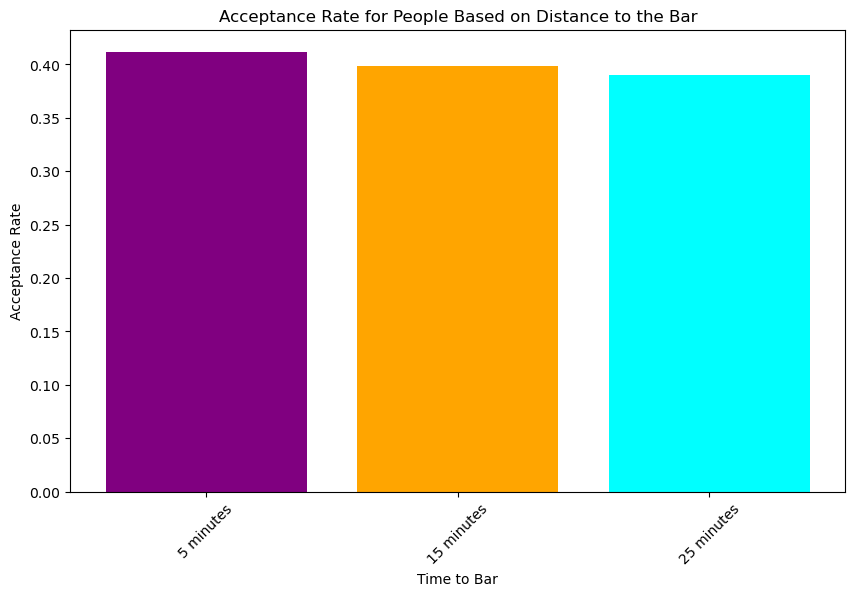

In [117]:
group1 = bar_coupons[bar_coupons['toCoupon_GEQ5min'] == 1]
group2 = bar_coupons[bar_coupons['toCoupon_GEQ15min'] == 1]
group3 = bar_coupons[bar_coupons['toCoupon_GEQ25min'] == 1]

acceptance_rate_group1 = group1['Y'].sum() / len(group1)
acceptance_rate_group2 = group2['Y'].sum() / len(group2)
acceptance_rate_group3 = group3['Y'].sum() / len(group3)

# Acceptance rate for people within different time to bar
time_to_bar = ['5 minutes', '15 minutes', '25 minutes']
acceptance_rates_bar = [acceptance_rate_group1, acceptance_rate_group2, acceptance_rate_group3]

# Set colors for each bar in the chart
colors = ['purple', 'orange', 'cyan']

plt.figure(figsize=(10,6))
plt.bar(time_to_bar, acceptance_rates_bar, color=colors)
plt.xlabel('Time to Bar')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate for People Based on Distance to the Bar')
plt.xticks(rotation=45)
plt.show()

## Surprisingly, the acceptance rate for bar coupons is relatively consistent across all 3 distance groups

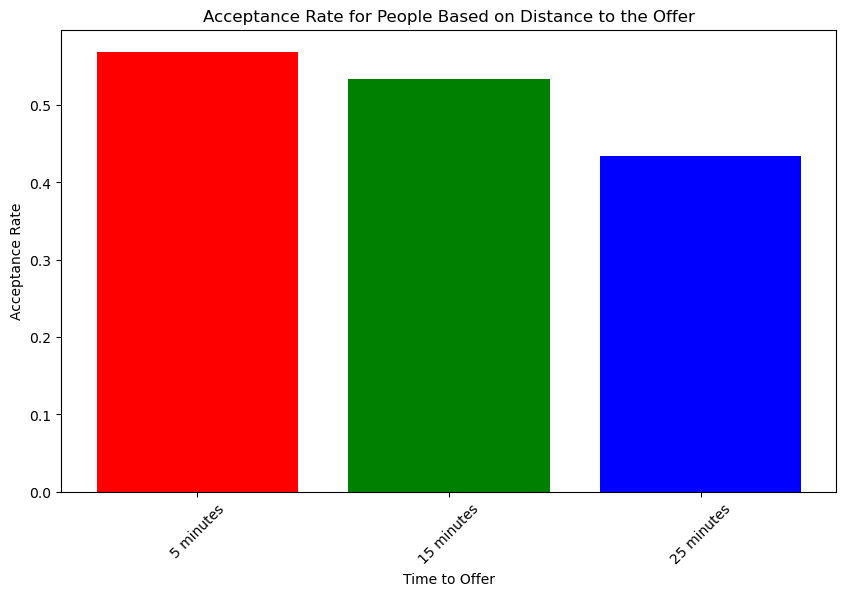

In [116]:
group1 = data[data['toCoupon_GEQ5min'] == 1]
group2 = data[data['toCoupon_GEQ15min'] == 1]
group3 = data[data['toCoupon_GEQ25min'] == 1]

acceptance_rate_group1 = group1['Y'].sum() / len(group1)
acceptance_rate_group2 = group2['Y'].sum() / len(group2)
acceptance_rate_group3 = group3['Y'].sum() / len(group3)

# Acceptance rate for people within different time to coupon
time_to_offer = ['5 minutes', '15 minutes', '25 minutes']
acceptance_rates_distance = [acceptance_rate_group1, acceptance_rate_group2, acceptance_rate_group3]

# Set colors for each bar in the chart
colors = ['red', 'green', 'blue']

plt.figure(figsize=(10,6))
plt.bar(time_to_offer, acceptance_rates_distance, color=colors)
plt.xlabel('Time to Offer')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate for People Based on Distance to the Offer')
plt.xticks(rotation=45)
plt.show()

## In contrast, there is a more significant difference for all coupon offers accros the 3 groups, with a more than 30% boost to the acceptance rate when the offer location is within 5 minutes of the recipient relative to offers in the 25 minute category

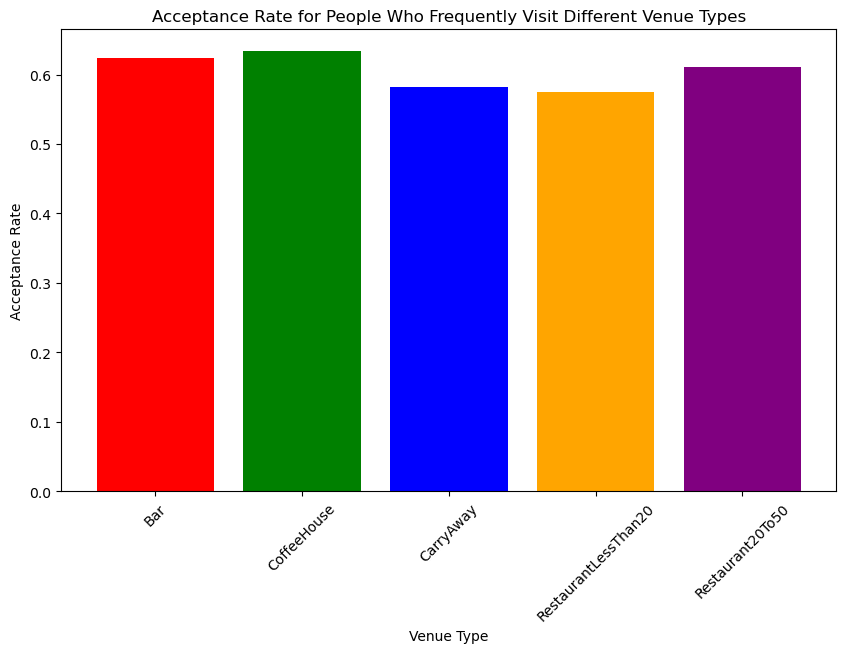

In [115]:
categories = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
acceptance_rates = {}

for category in categories:
    more_frequent = data[(data[category].isin(['1~3', '4~8', 'gt8']))]
    acceptance_rate = more_frequent['Y'].sum() / len(more_frequent)
    acceptance_rates[category] = acceptance_rate

# Acceptance rate for people who frequently visit different venue types
venue_labels = list(acceptance_rates.keys())
acceptance_rates_values = list(acceptance_rates.values())

# Set colors for each bar in the chart
colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.figure(figsize=(10,6))
plt.bar(venue_labels, acceptance_rates_values, color=colors)
plt.xlabel('Venue Type')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate for People Who Frequently Visit Different Venue Types')
plt.xticks(rotation=45)
plt.show()



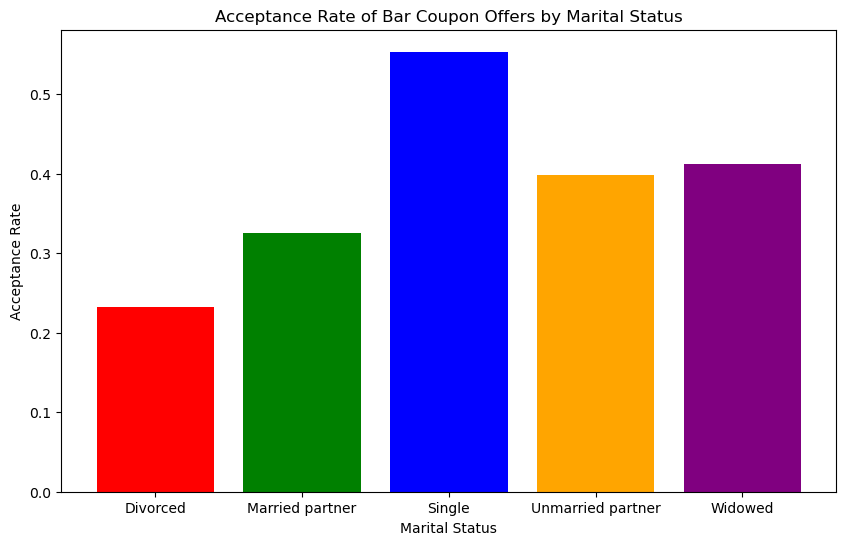

In [118]:
bar_offers = data[data['coupon'] == 'Bar']
# Set colors for each bar in the chart
colors = ['red', 'green', 'blue', 'orange', 'purple']

marital_acceptance = bar_offers.groupby('maritalStatus')['Y'].mean()
plt.figure(figsize=(10,6))
plt.bar(marital_acceptance.index, marital_acceptance.values, color=colors)
plt.xlabel('Marital Status')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate of Bar Coupon Offers by Marital Status')
plt.show()


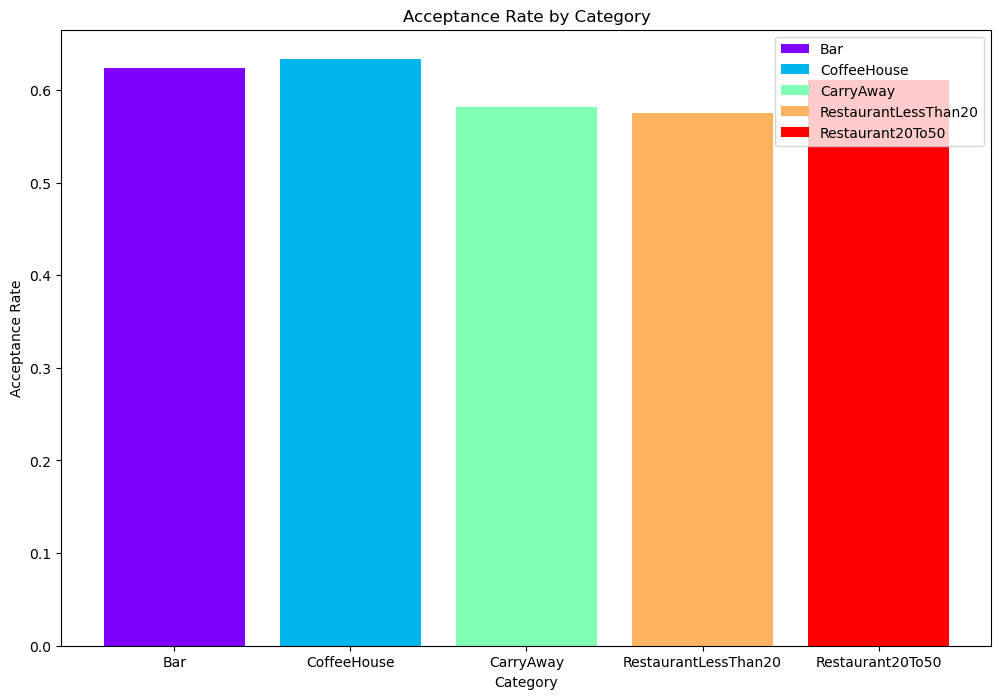

In [85]:
import matplotlib.cm as cm

categories = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
acceptance_rates = {}

for category in categories:
    more_frequent = data[(data[category].isin(['1~3', '4~8', 'gt8']))]
    acceptance_rate = more_frequent['Y'].sum() / len(more_frequent)
    acceptance_rates[category] = acceptance_rate

# Specify colors from the colormap
colors = cm.rainbow(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12,8))  # Increase the size of the figure
bars = plt.bar(acceptance_rates.keys(), acceptance_rates.values(), color=colors)

# Add a legend
plt.legend(bars, acceptance_rates.keys())

plt.xlabel('Category')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Category')
plt.show()


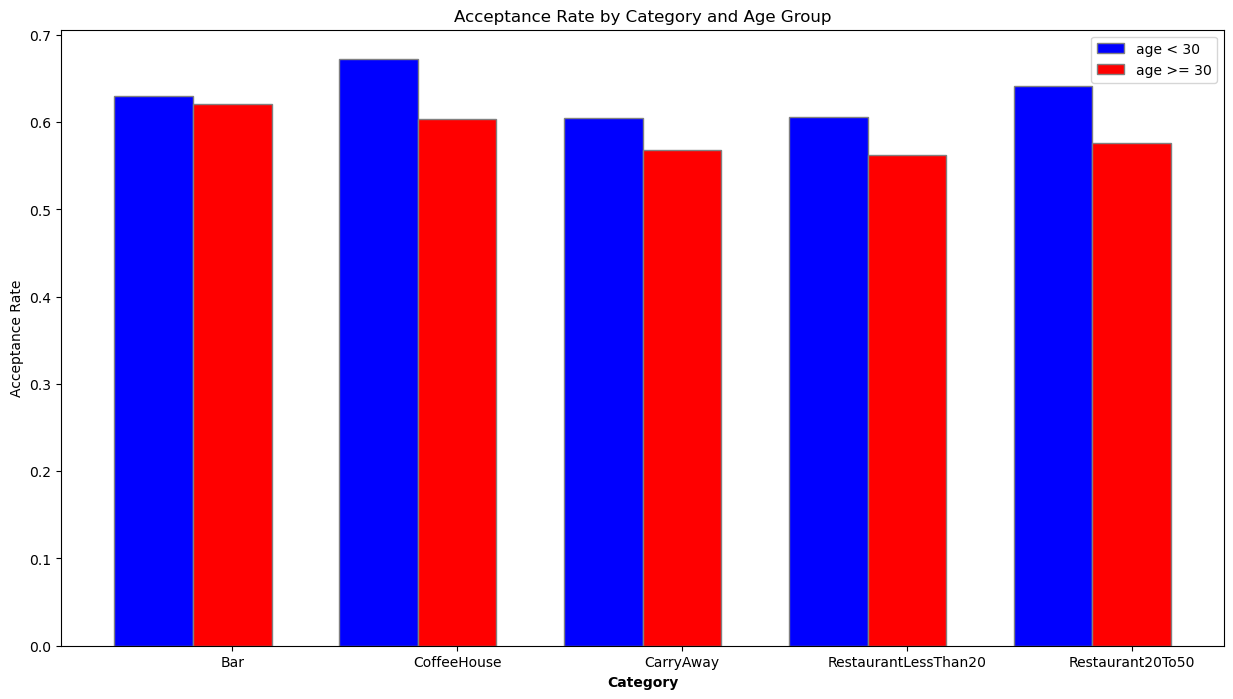

In [87]:
# Convert 'age' column to numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')

categories = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
age_groups = ['<30', '>=30']
acceptance_rates = {category: {} for category in categories}

# Calculate acceptance rates for each category based on age
for category in categories:
    for age_group in age_groups:
        if age_group == '<30':
            subgroup = data[(data[category].isin(['1~3', '4~8', 'gt8'])) & (data['age'] < 30)]
        else:
            subgroup = data[(data[category].isin(['1~3', '4~8', 'gt8'])) & (data['age'] >= 30)]
        
        acceptance_rate = subgroup['Y'].sum() / len(subgroup) if len(subgroup) > 0 else 0
        acceptance_rates[category][age_group] = acceptance_rate

# Prepare data for plotting
labels = categories
under_30 = [acceptance_rates[category]['<30'] for category in categories]
over_30 = [acceptance_rates[category]['>=30'] for category in categories]

# Specify bar width
bar_width = 0.35

# Plotting
plt.figure(figsize=(15,8))
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

plt.bar(r1, under_30, color='b', width=bar_width, edgecolor='grey', label='age < 30')
plt.bar(r2, over_30, color='r', width=bar_width, edgecolor='grey', label='age >= 30')

plt.xlabel('Category', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(under_30))], labels)
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Category and Age Group')
plt.legend()

plt.show()


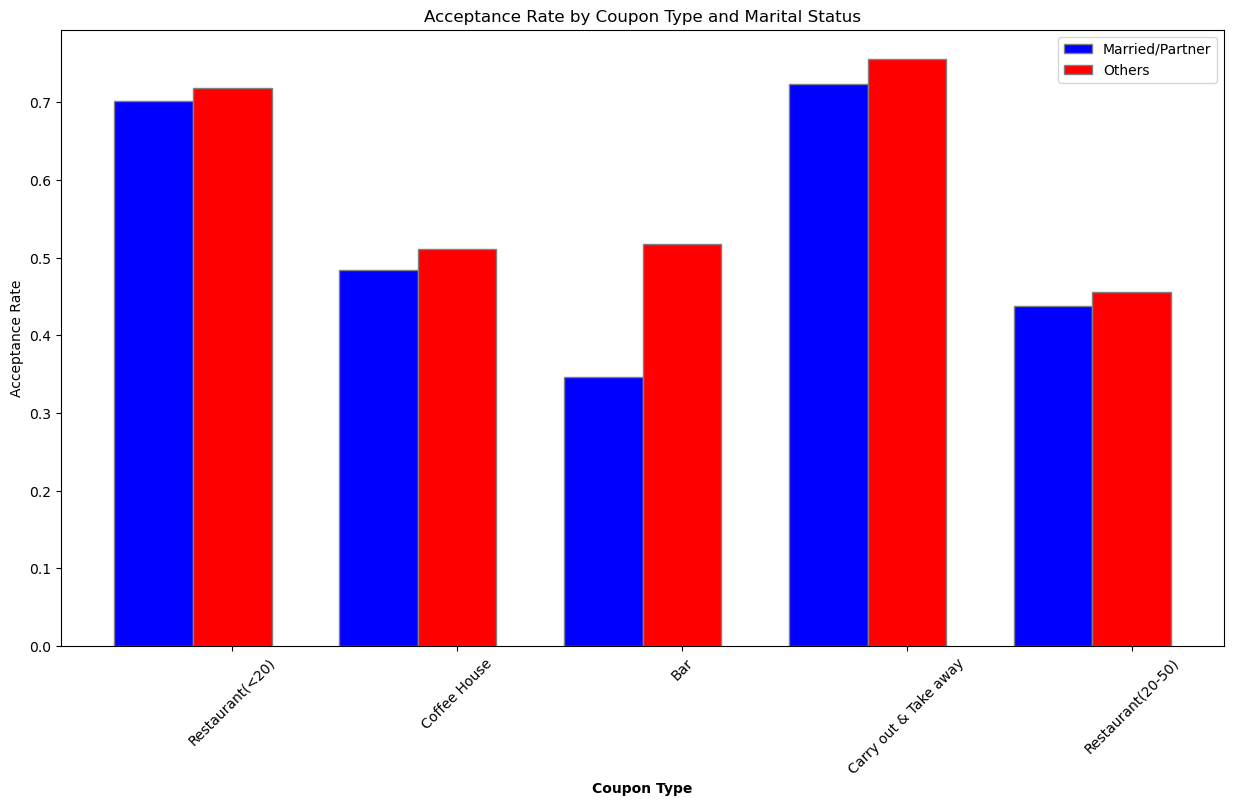

In [88]:
coupon_types = data['coupon'].unique()
marital_groups = ['Married/Partner', 'Others']
acceptance_rates = {coupon_type: {} for coupon_type in coupon_types}

# Calculate acceptance rates for each coupon type based on marital status
for coupon_type in coupon_types:
    for marital_group in marital_groups:
        if marital_group == 'Married/Partner':
            subgroup = data[(data['coupon'] == coupon_type) & (data['maritalStatus'].isin(['Married partner', 'Unmarried partner']))]
        else:
            subgroup = data[(data['coupon'] == coupon_type) & (~data['maritalStatus'].isin(['Married partner', 'Unmarried partner']))]
        
        acceptance_rate = subgroup['Y'].sum() / len(subgroup) if len(subgroup) > 0 else 0
        acceptance_rates[coupon_type][marital_group] = acceptance_rate

# Prepare data for plotting
labels = coupon_types
married_partner = [acceptance_rates[coupon_type]['Married/Partner'] for coupon_type in coupon_types]
others = [acceptance_rates[coupon_type]['Others'] for coupon_type in coupon_types]

# Specify bar width
bar_width = 0.35

# Plotting
plt.figure(figsize=(15,8))
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

plt.bar(r1, married_partner, color='b', width=bar_width, edgecolor='grey', label='Married/Partner')
plt.bar(r2, others, color='r', width=bar_width, edgecolor='grey', label='Others')

plt.xlabel('Coupon Type', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(married_partner))], labels, rotation=45)
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Coupon Type and Marital Status')
plt.legend()

plt.show()


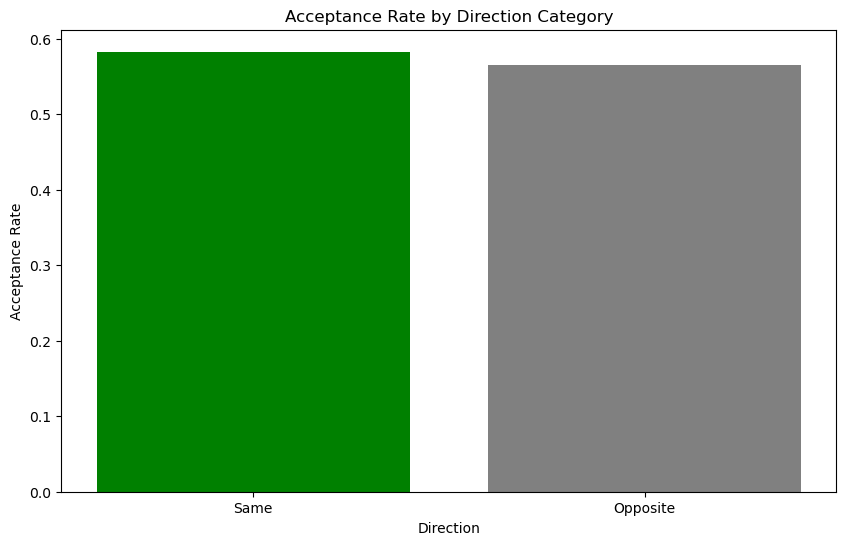

In [97]:
# Calculate the acceptance rate when direction is the same
direction_same_acceptance = data[data['direction_same'] == 1]['Y'].mean()

# Calculate the acceptance rate when direction is opposite
direction_opp_acceptance = data[data['direction_opp'] == 1]['Y'].mean()

# Create the bar chart
plt.figure(figsize=(10,6))
plt.bar(['Same', 'Opposite'], [direction_same_acceptance, direction_opp_acceptance], color=['green', 'gray'])

# Add labels and title
plt.xlabel('Direction')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Direction Category')

# Display the chart
plt.show()




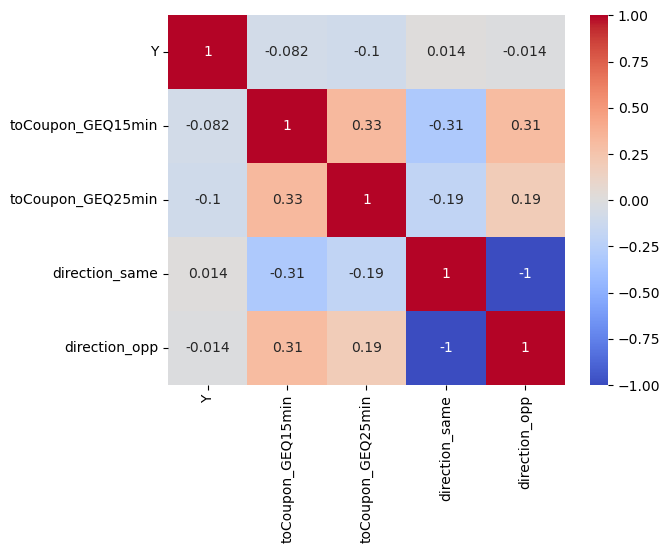

In [100]:
# First, we select only the relevant columns
subset_data = data[['Y', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]

# Compute the correlation matrix only for the selected variables
corr = subset_data.corr()

# We'll use seaborn to generate the heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, # This will write the value of correlation on each cell
            cmap='coolwarm') # Choosing a color theme that's easy on the eyes

# Display the plot
plt.show()



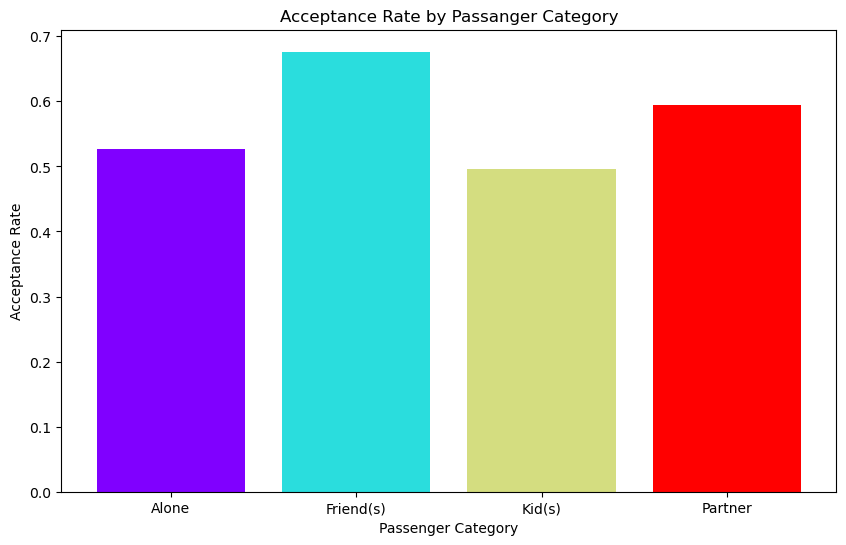

In [110]:
import matplotlib.cm as cm

# Calculate the acceptance rate for each passenger category
passenger_acceptance = data.groupby('passanger')['Y'].mean()

# Create a color map
colors = cm.rainbow(np.linspace(0, 1, len(passenger_acceptance)))

# Create the bar chart
plt.figure(figsize=(10,6))
plt.bar(passenger_acceptance.index, passenger_acceptance.values, color=colors)
plt.xlabel('Passenger Category')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Passanger Category')
plt.show()



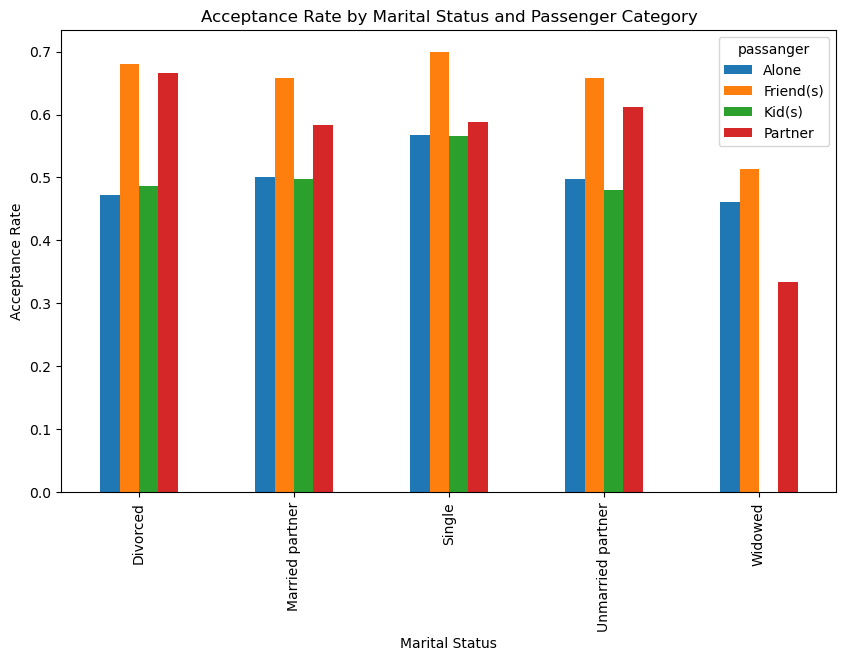

In [112]:
# Calculate the acceptance rate for each combination of marital status and passenger category
grouped_acceptance = data.groupby(['maritalStatus', 'passanger'])['Y'].mean().unstack()

# Create the grouped bar chart
grouped_acceptance.plot(kind='bar', figsize=(10,6))
plt.xlabel('Marital Status')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Marital Status and Passenger Category')
plt.show()


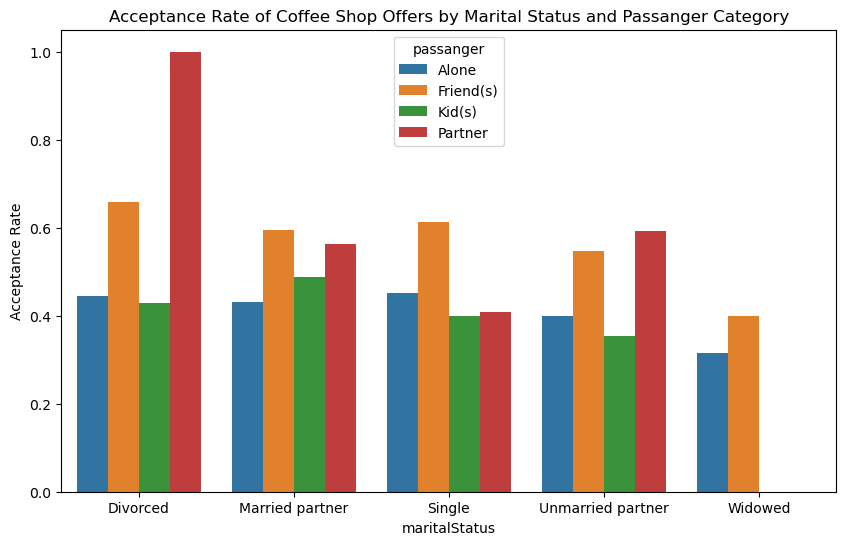

In [123]:
# Filter out coffee shop offers
coffee_shop_offers = data[data['coupon'] == 'Coffee House']

# Group by 'Marital Status' and 'Passenger'
grouped = coffee_shop_offers.groupby(['maritalStatus', 'passanger'])

# Compute acceptance rate for each group
grouped_acceptance_rate = grouped['Y'].sum() / grouped.size()

# Convert to DataFrame for easier visualization
grouped_acceptance_rate_df = grouped_acceptance_rate.reset_index()
grouped_acceptance_rate_df.columns = ['maritalStatus', 'passanger', 'acceptance_rate']

# Create a pivot table for the heatmap
pivot = grouped_acceptance_rate_df.pivot(index='passanger', columns='maritalStatus', values='acceptance_rate')

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='maritalStatus', y='acceptance_rate', hue='passanger', data=grouped_acceptance_rate_df)
plt.title('Acceptance Rate of Coffee Shop Offers by Marital Status and Passanger Category')
plt.ylabel('Acceptance Rate')
plt.show()


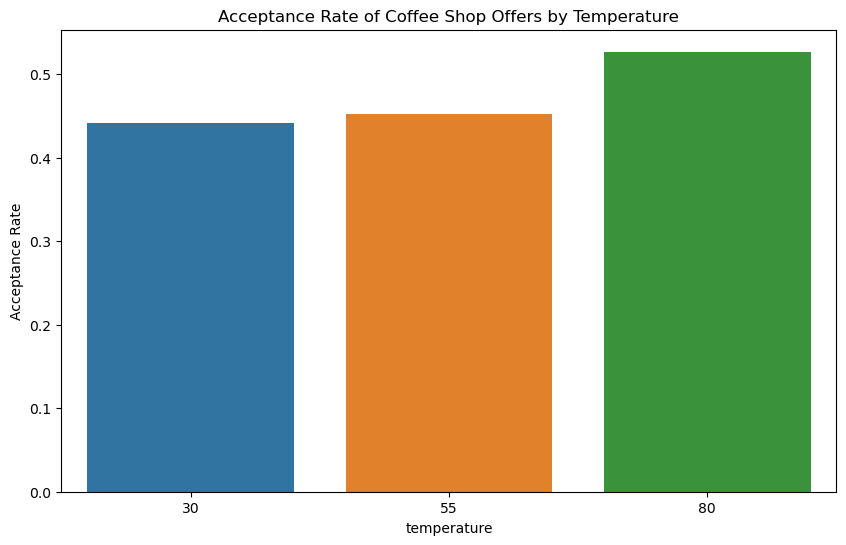

In [124]:
# Group by 'temperature'
grouped_temp = coffee_shop_offers.groupby('temperature')

# Compute acceptance rate for each group
grouped_acceptance_rate_temp = grouped_temp['Y'].sum() / grouped_temp.size()

# Convert to DataFrame for easier visualization
grouped_acceptance_rate_temp_df = grouped_acceptance_rate_temp.reset_index()
grouped_acceptance_rate_temp_df.columns = ['temperature', 'acceptance_rate']

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='temperature', y='acceptance_rate', data=grouped_acceptance_rate_temp_df)
plt.title('Acceptance Rate of Coffee Shop Offers by Temperature')
plt.ylabel('Acceptance Rate')
plt.show()


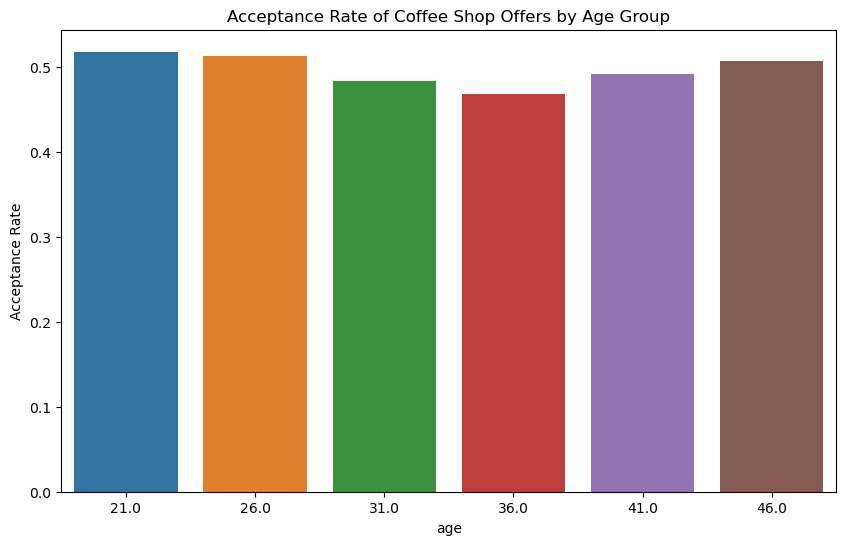

In [125]:
# Group by 'age'
grouped_age = coffee_shop_offers.groupby('age')

# Compute acceptance rate for each group
grouped_acceptance_rate_age = grouped_age['Y'].sum() / grouped_age.size()

# Convert to DataFrame for easier visualization
grouped_acceptance_rate_age_df = grouped_acceptance_rate_age.reset_index()
grouped_acceptance_rate_age_df.columns = ['age', 'acceptance_rate']

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='age', y='acceptance_rate', data=grouped_acceptance_rate_age_df)
plt.title('Acceptance Rate of Coffee Shop Offers by Age Group')
plt.ylabel('Acceptance Rate')
plt.show()
